In [1]:
import requests
import pandas as pd
import json
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# unique EIA API key
api_key = 'N/A'

# Total energy consumption

link
https://www.eia.gov/opendata/qb.php?category=40236

In [4]:
# EIA Data Sets > State Energy Data System (SEDS) > Consumption > Total All Sectors
url = 'http://api.eia.gov/category/?api_key=api_key_id=40236'
req = requests.get(url)
data = req.json()
data

{'request': {'category_id': 40236, 'command': 'category'},
 'category': {'category_id': '40236',
  'parent_category_id': '40204',
  'name': 'Total All Sectors',
  'notes': '',
  'childcategories': [{'category_id': 40377, 'name': 'Total (per Capita)'},
   {'category_id': 40378, 'name': 'Total (per $ of real GDP)'},
   {'category_id': 40920, 'name': 'All Petroleum Products'},
   {'category_id': 40921,
    'name': 'All Petroleum Products excluding Fuel Ethanol'},
   {'category_id': 40922, 'name': 'Asphalt and Road Oil'},
   {'category_id': 40923,
    'name': 'Asphalt and road oil, aviation gasoline, kerosene, lubricants, petroleum coke, and "other petroleum products"'},
   {'category_id': 40924, 'name': 'Aviation Gasoline'},
   {'category_id': 40925, 'name': 'Biomass'},
   {'category_id': 40927, 'name': 'Coal'},
   {'category_id': 40928, 'name': 'Coal at Coke Plants'},
   {'category_id': 40929, 'name': 'Distillate Fuel Oil'},
   {'category_id': 40930, 'name': 'Electrical System Energy Los

In [5]:
all_states=pd.DataFrame(data['category']['childseries'])
all_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
f            52 non-null object
name         52 non-null object
series_id    52 non-null object
units        52 non-null object
updated      52 non-null object
dtypes: object(5)
memory usage: 2.1+ KB


In [6]:
all_states.head()

,f,name,series_id,units,updated
0,A,"Total energy consumption, Alaska",SEDS.TETCB.AK.A,Billion Btu,26-OCT-18 03.52.18 PM
1,A,"Total energy consumption, Alabama",SEDS.TETCB.AL.A,Billion Btu,26-OCT-18 03.52.18 PM
2,A,"Total energy consumption, Arkansas",SEDS.TETCB.AR.A,Billion Btu,26-OCT-18 03.52.18 PM
3,A,"Total energy consumption, Arizona",SEDS.TETCB.AZ.A,Billion Btu,26-OCT-18 03.52.18 PM
4,A,"Total energy consumption, California",SEDS.TETCB.CA.A,Billion Btu,26-OCT-18 03.52.18 PM


## Collect data for each state

In [7]:
state_name = []
state_abbr = []
state_energy = []
year = []
#energy = pd.DataFrame(columns=['State','Abbr_name','Total-energy(BTU)','year'])
for i,id in enumerate(all_states['series_id']):
    # url of each state
    url_id = 'http://api.eia.gov/series/?api_key=api_key&series_id=' + id
    req_id = requests.get(url_id)
    df_id = req_id.json()
    
    # extract data
    state_name.append(df_id['series'][0]['name'].split()[-1])
    state_abbr.append(df_id['series'][0]['geography'].split('-')[-1])
    state_energy.append(df_id['series'][0]['data'][0][1])
    year.append(df_id['series'][0]['data'][0][0])   

In [8]:
energy = pd.DataFrame()
energy['State'] = state_name
energy['Abbr_name'] = state_abbr
energy['Total-energy(BTU)'] = state_energy
energy['year'] = year
energy.head()


,State,Abbr_name,Total-energy(BTU),year
0,Alaska,AK,599964,2016
1,Alabama,AL,1933554,2016
2,Arkansas,AR,1056497,2016
3,Arizona,AZ,1470610,2016
4,California,CA,7830294,2016


## Remove value of USA

In [9]:
id_usa = energy[energy['Abbr_name']=='USA'].index.values.astype(int)[0]

In [10]:
energy_1 = energy.drop(index=id_usa)
energy_1 = energy_1.reset_index(drop=True)
energy_1

,State,Abbr_name,Total-energy(BTU),year
0,Alaska,AK,599964,2016
1,Alabama,AL,1933554,2016
2,Arkansas,AR,1056497,2016
3,Arizona,AZ,1470610,2016
4,California,CA,7830294,2016
5,Colorado,CO,1484567,2016
6,Connecticut,CT,723886,2016
7,Columbia,DC,174155,2016
8,Delaware,DE,273471,2016
9,Florida,FL,4240212,2016


## Map plot

In [11]:
# color scale - BWR
color=[[1.0, 'rgb(165,0,38)'], [1-0.1111111111111111, 'rgb(215,48,39)'], [1-0.2222222222222222, 'rgb(244,109,67)'], [1-0.3333333333333333, 'rgb(253,174,97)'], [1-0.4444444444444444, 'rgb(254,224,144)'], [1-0.5555555555555556, 'rgb(224,243,248)'], [1-0.6666666666666666, 'rgb(171,217,233)'], [1-0.7777777777777778, 'rgb(116,173,209)'], [1-0.8888888888888888, 'rgb(69,117,180)'], [0.0, 'rgb(49,54,149)']]
color

[[1.0, 'rgb(165,0,38)'],
 [0.8888888888888888, 'rgb(215,48,39)'],
 [0.7777777777777778, 'rgb(244,109,67)'],
 [0.6666666666666667, 'rgb(253,174,97)'],
 [0.5555555555555556, 'rgb(254,224,144)'],
 [0.4444444444444444, 'rgb(224,243,248)'],
 [0.33333333333333337, 'rgb(171,217,233)'],
 [0.2222222222222222, 'rgb(116,173,209)'],
 [0.11111111111111116, 'rgb(69,117,180)'],
 [0.0, 'rgb(49,54,149)']]

In [12]:
df = energy_1[['Abbr_name', 'Total-energy(BTU)']]
df.head()

,Abbr_name,Total-energy(BTU)
0,AK,599964
1,AL,1933554
2,AR,1056497
3,AZ,1470610
4,CA,7830294


In [13]:
df['text'] = energy_1['State'] + '<br>' +\
    'Total energy consumption in 2016 [BTU]: '+ energy_1['Total-energy(BTU)'].astype(str)

In [14]:
df.head()

,Abbr_name,Total-energy(BTU),text
0,AK,599964,Alaska<br>Total energy consumption in 2016 [BT...
1,AL,1933554,Alabama<br>Total energy consumption in 2016 [B...
2,AR,1056497,Arkansas<br>Total energy consumption in 2016 [...
3,AZ,1470610,Arizona<br>Total energy consumption in 2016 [B...
4,CA,7830294,California<br>Total energy consumption in 2016...


In [15]:
data = [ dict(
        type='choropleth',
        colorscale = color,
        autocolorscale = False,
        locations = df['Abbr_name'],
        z = df['Total-energy(BTU)'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Trillion BTU")
        ) ]

In [16]:
layout = dict(
        title = '2016 US Energy consumptions by State',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
layout

{'title': '2016 US Energy consumptions by State',
 'geo': {'scope': 'usa',
  'projection': {'type': 'albers usa'},
  'showlakes': True,
  'lakecolor': 'rgb(255, 255, 255)'}}

In [17]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='', api_key='')

In [18]:
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='Energy consumption' )

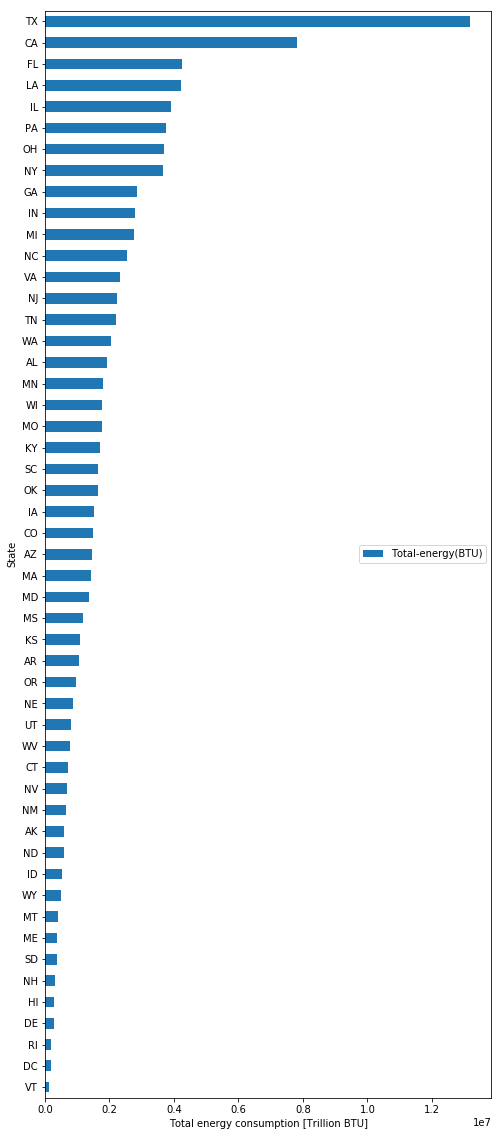

In [19]:
df_sort = df.sort_values(by=['Total-energy(BTU)'],ascending=True)
df_sort = df_sort.reset_index(drop=True)

df_sort.plot(kind='barh',figsize=(8,20))
plt.legend(loc='right')
plt.yticks(ticks=df_sort.index,labels=df_sort['Abbr_name'])
plt.xlabel('Total energy consumption [Trillion BTU]')
plt.ylabel('State')
plt.show()

## Top 5 states have the lowest energy consumption

In [20]:
df_sort.head()

,Abbr_name,Total-energy(BTU),text
0,VT,128656,Vermont<br>Total energy consumption in 2016 [B...
1,DC,174155,Columbia<br>Total energy consumption in 2016 [...
2,RI,186184,Island<br>Total energy consumption in 2016 [BT...
3,DE,273471,Delaware<br>Total energy consumption in 2016 [...
4,HI,282912,Hawaii<br>Total energy consumption in 2016 [BT...


## Top 5 states have the highest energy consumption

In [21]:
df_sort.tail()

,Abbr_name,Total-energy(BTU),text
46,IL,3907112,Illinois<br>Total energy consumption in 2016 [...
47,LA,4205302,Louisiana<br>Total energy consumption in 2016 ...
48,FL,4240212,Florida<br>Total energy consumption in 2016 [B...
49,CA,7830294,California<br>Total energy consumption in 2016...
50,TX,13183479,Texas<br>Total energy consumption in 2016 [BTU...


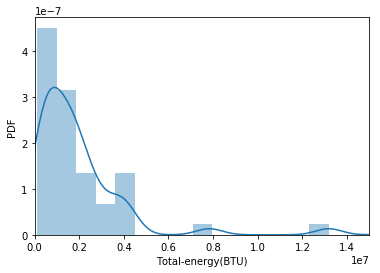

In [22]:
sns.distplot(df['Total-energy(BTU)'])
plt.xlim([0,15000000])
plt.ylabel('PDF')
plt.show()

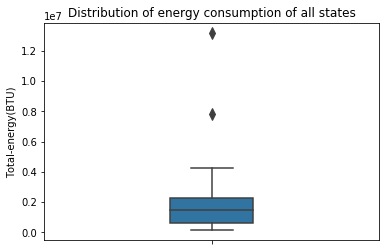

In [23]:
sns.boxplot(df['Total-energy(BTU)'],orient='v',width=0.25,fliersize=8)
plt.title('Distribution of energy consumption of all states')
plt.show()

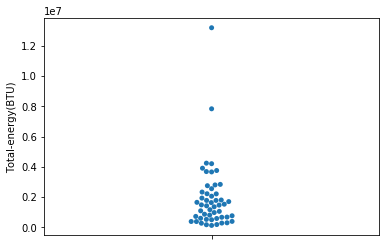

In [24]:
sns.swarmplot(y=df['Total-energy(BTU)'])

In [25]:
df['Total-energy(BTU)'].describe()

count    5.100000e+01
mean     1.908507e+06
std      2.159481e+06
min      1.286560e+05
25%      6.338925e+05
50%      1.470610e+06
75%      2.275668e+06
max      1.318348e+07
Name: Total-energy(BTU), dtype: float64

In [26]:
# The skewness
df['Total-energy(BTU)'].skew()

3.3734921759070047